In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [78]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [79]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [80]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [81]:
X_train[0].shape

(28, 28)

In [82]:
X_test.shape

(10000, 28, 28)

In [83]:
# training set : 60,000 image each having 28*28 pix
# testing set: 10,000 image each having 28*28 pix

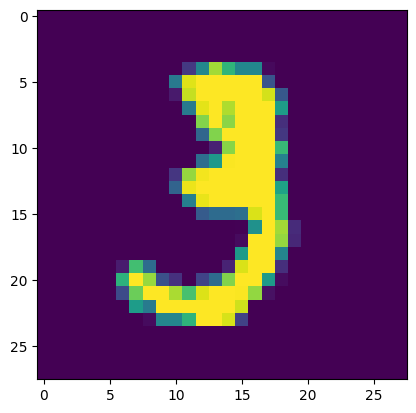

In [84]:
# convert pix into imaage using ishow function of matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [85]:
# value are 0 to 256 in each image array
# convert array as 0 to 1 so the NN's weigth are pridict without error
X_train = X_train/255
X_test = X_test/255

In [86]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [87]:
# convert 2d into 1d by using flatten layer
model = Sequential()

In [88]:
model.add(Flatten(input_shape=(28,28)))

In [89]:
#hidden layer
model.add(Dense(128,activation='relu'))
# output layer
model.add(Dense(10,activation='softmax'))

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')
# in loss = scc no need to one hot encode

In [92]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2867 - val_loss: 0.1606
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1322 - val_loss: 0.1180
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0894 - val_loss: 0.1054
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0656 - val_loss: 0.0905
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0507 - val_loss: 0.0906
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0380 - val_loss: 0.0823
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0314 - val_loss: 0.0849
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0244 - val_loss: 0.1069
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0191 - val_loss: 0.0929
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.016

In [93]:
y_prid = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [94]:
y_log = y_prid.argmax(axis=1)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test,y_log)

0.9779